In [20]:
#SIR
import numpy as np

beta=3
gamma=1

T=10
dt=0.001
nsteps=round(T/dt)
v_S=np.zeros([nsteps+1])
v_I=np.zeros([nsteps+1])
v_R=np.zeros([nsteps+1])
v_S[0]=0.99
v_I[0]=0.01

# SIR
for t in range(nsteps):
    v_S[t+1]=v_S[t]-dt*beta*v_S[t]*v_I[t]
    v_I[t+1]=v_I[t]+dt*beta*v_S[t]*v_I[t]-gamma*v_I[t]*dt
    v_R[t+1]=v_R[t]+gamma*v_I[t]*dt

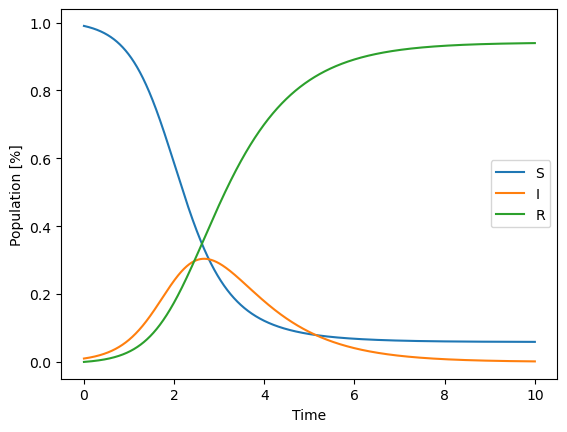

In [21]:
#SIR diagram
import matplotlib.pyplot as plt
trange=[t*dt for t in range(nsteps+1)]
plt.figure()

plt.plot(trange,v_S,label='S')
plt.plot(trange,v_I,label='I')
plt.plot(trange,v_R,label='R')
plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/01_SIR.png', bbox_inches='tight') #Ábra mentése

In [22]:
#SIR modellből kinyert adatok generálása
#halottak száma (v_R)
deaths = 0.00
for i in v_R:
    deaths += i

print(sum(v_R))
    
print('Total number of deaths: ', deaths)

#Összes fertőzőttek száma (v_I)
infected = sum(v_I)*dt

#infected += deaths
print('Total number of infections: ', infected)

#Maximális megbetegedések száma egyszerre
beteg = 0.00
for i in v_I:
    if(i > beteg):
        beteg = i

print('Maximum amount of infected people at the same time: ', beteg)

#Milyen hosszú időszakban volt t < v_I(t)
#'túlterhelt időszak'
t = 0.05
greater = 0.000
for i in v_I:
    if(i > t):
        greater += dt
        
print('Length of time when v_I(t)>t: ', greater)

6348.585143311749
Total number of deaths:  6348.585143311749
Total number of infections:  0.9393846432467118
Maximum amount of infected people at the same time:  0.3039299066025501
Length of time when v_I(t)>t:  4.885999999999966


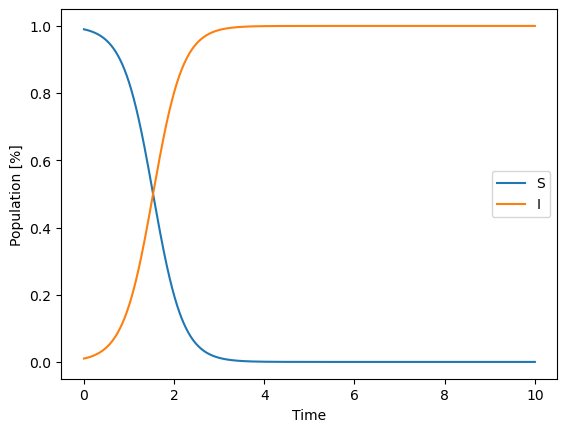

In [23]:
#SI diagram and modell
beta=3
gamma=1

# SI
for t in range(nsteps):
    v_S[t+1]=v_S[t]-dt*beta*v_S[t]*v_I[t]
    v_I[t+1]=v_I[t]+dt*beta*v_S[t]*v_I[t]

plt.figure()
plt.plot(trange,v_S,label='S')
plt.plot(trange,v_I,label='I')
plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/02_SI.png', bbox_inches='tight') #Ábra mentése

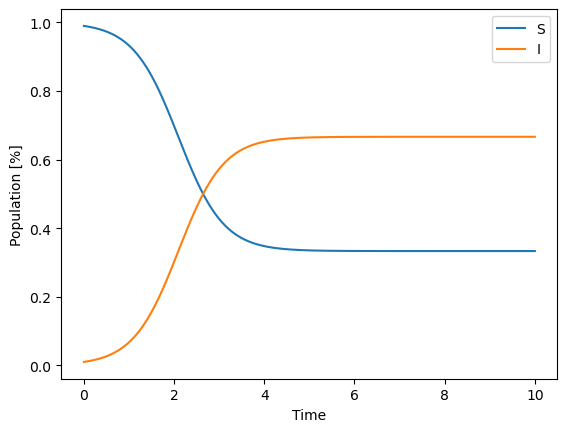

In [24]:
#SIS diagram and modell
beta=3
gamma=1

# SIS
for t in range(nsteps):
    v_S[t+1]=v_S[t]-dt*beta*v_S[t]*v_I[t]+gamma*v_I[t]*dt
    v_I[t+1]=v_I[t]+dt*beta*v_S[t]*v_I[t]-gamma*v_I[t]*dt

plt.figure()
plt.plot(trange,v_S,label='S')
plt.plot(trange,v_I,label='I')
plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/03_SIS_3_1.png', bbox_inches='tight') #Ábra mentése

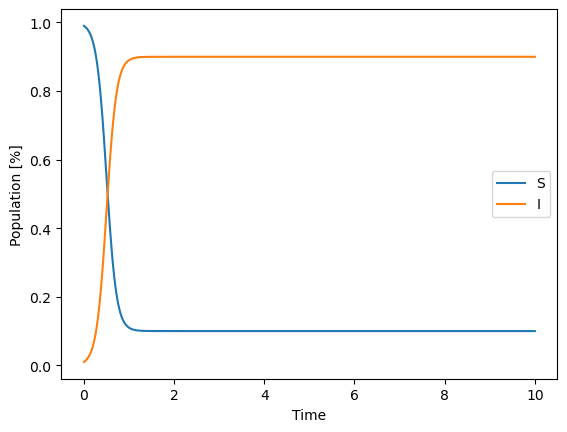

In [25]:
#SIS diagram and model
beta=10
gamma=1

# SIS
for t in range(nsteps):
    v_S[t+1]=v_S[t]-dt*beta*v_S[t]*v_I[t]+gamma*v_I[t]*dt
    v_I[t+1]=v_I[t]+dt*beta*v_S[t]*v_I[t]-gamma*v_I[t]*dt

plt.figure()
plt.plot(trange,v_S,label='S')
plt.plot(trange,v_I,label='I')
plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/03_SIS_10_1.png', bbox_inches='tight') #Ábra mentése

In [26]:
# SIR communities
L=3
w=[0.5,0.3,0.2]
A=[[6,2,1],
   [2,3,1],
   [1,1,0.5]]

# time and steps
T=10
dt=0.001
nsteps=round(T/dt)
v_S=[[0,0,0] for t in range(nsteps+1)]
v_I=[[0,0,0] for t in range(nsteps+1)]
v_R=[[0,0,0] for t in range(nsteps+1)]

# initial condition
v_S[0]=[0.95,1,1]   #Egymás alatti értékeknek 1-et kell adni
v_I[0]=[0.05,0,0]

# model parameters
beta=1.5
gamma=1

# SIR for communities
for t in range(nsteps):
    for l in  range(L): 
         v_S[t+1][l]=v_S[t][l]-dt*beta*v_S[t][l]*sum(A[k][l]*w[k]*v_I[t][k] for k in range(L))
         v_I[t+1][l]=v_I[t][l]+dt*beta*v_S[t][l]*sum(A[k][l]*w[k]*v_I[t][k] for k in range(L))-gamma*v_I[t][l]*dt
         v_R[t+1][l]=v_R[t][l]+gamma*v_I[t][l]*dt

In [27]:
A
v_S[1]

[0.9497862499999999, 0.999925, 0.9999625]

In [28]:
v_Sa=[v_S[t][0] for t in range(nsteps+1)]
#v_Sa
v_Ia=[v_I[t][0] for t in range(nsteps+1)]
#v_Ia
v_Ra=[v_R[t][0] for t in range(nsteps+1)]
#v_Ra

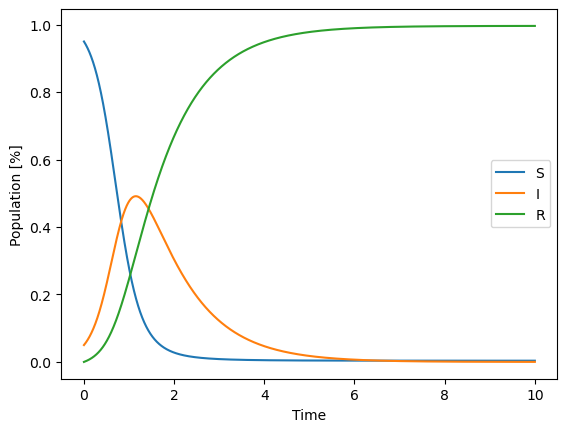

In [29]:
#SIR communities diagram
trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_Sa,label='S')
plt.plot(trange,v_Ia,label='I')
plt.plot(trange,v_Ra,label='R')
plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/04_SIR_communities_a.png', bbox_inches='tight') #Ábra mentése

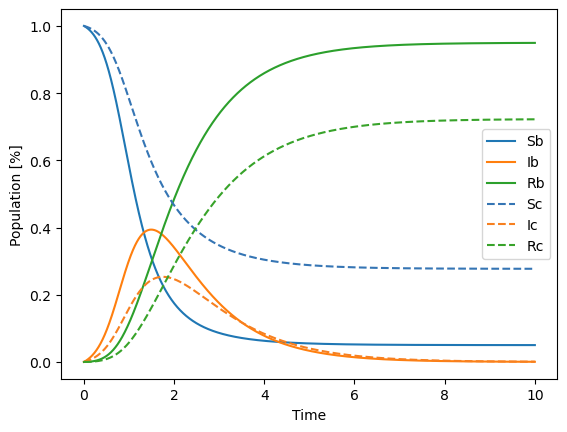

In [30]:
v_Sb=[v_S[t][1] for t in range(nsteps+1)]
v_Ib=[v_I[t][1] for t in range(nsteps+1)]
v_Rb=[v_R[t][1] for t in range(nsteps+1)]
#SIR communities diagram
trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_Sb,label='Sb')
plt.plot(trange,v_Ib,label='Ib')
plt.plot(trange,v_Rb,label='Rb')


plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/04_SIR_communities_1.5_1_b.png', bbox_inches='tight') #Ábra mentése




v_Sc=[v_S[t][2] for t in range(nsteps+1)]
v_Ic=[v_I[t][2] for t in range(nsteps+1)]
v_Rc=[v_R[t][2] for t in range(nsteps+1)]

#SIR communities diagram
trange=[t*dt for t in range(nsteps+1)]
plt.plot(trange,v_Sc,linestyle='dashed',color="#3575b4",label='Sc')
plt.plot(trange,v_Ic,linestyle='dashed',color="#f78020",label='Ic')
plt.plot(trange,v_Rc,linestyle='dashed',color="#38a32a",label='Rc')
plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/SIR_communities_compare.png', bbox_inches='tight') #Ábra mentése

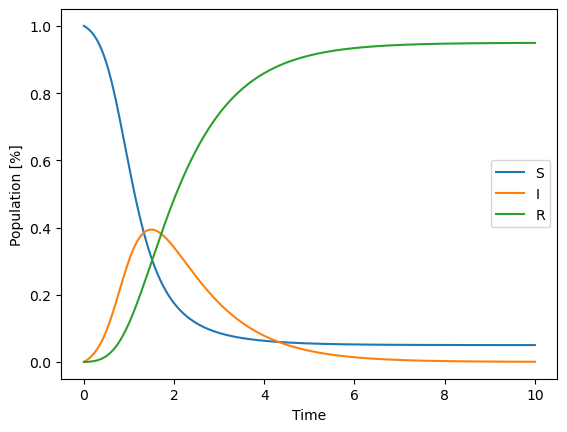

In [31]:
#SIR communities diagram
v_Sb=[v_S[t][1] for t in range(nsteps+1)]
v_Ib=[v_I[t][1] for t in range(nsteps+1)]
v_Rb=[v_R[t][1] for t in range(nsteps+1)]


trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_Sb,label='S')
plt.plot(trange,v_Ib,label='I')
plt.plot(trange,v_Rb,label='R')
plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/04_SIR_communities_b.png', bbox_inches='tight') #Ábra mentése

In [32]:
#SIR-ből SIR-D
beta=3
gamma=1
mu=0.01

T=10
dt=0.001
nsteps=round(T/dt)
v_S=np.zeros([nsteps+1])
v_I=np.zeros([nsteps+1])
v_R=np.zeros([nsteps+1])
v_D=np.zeros([nsteps+1])
v_S[0]=0.95
v_I[0]=0.05

for t in range(nsteps):
    mu = 0.01+v_I[t]/10
    v_S[t+1]=v_S[t]-dt*beta*v_S[t]*v_I[t]
    v_I[t+1]=v_I[t]+dt*beta*v_S[t]*v_I[t]-gamma*v_I[t]*dt
    v_R[t+1]=v_R[t]+(1-mu)*gamma*v_I[t]*dt
    v_D[t+1]=v_D[t]+mu*gamma*v_I[t]*dt

   # print('V_I: ', i, 'gamma*V_I[t]*dt', gamma*v_I[t]*dt)
#for i in v_I:
    

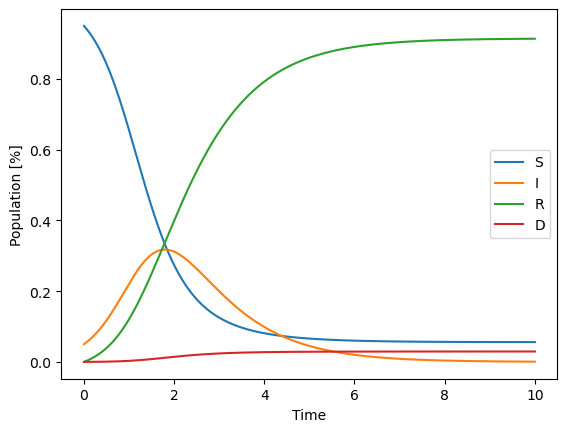

In [33]:
#SIRD diagram
trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_S,label='S')
plt.plot(trange,v_I,label='I')
plt.plot(trange,v_R,label='R')
plt.plot(trange,v_D,label='D')

plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/05_SIR_D.png', bbox_inches='tight') #Ábra mentése

In [34]:
#SIRD modellből kinyert adatok generálása
#halottak száma (v_R)

print('Total number of deaths: ', v_D[nsteps])

#Összes fertőzőttek száma (v_I)
infected = sum(v_I)*dt

print('Total number of infections: ', infected)

#Maximális megbetegedések száma egyszerre
print('Maximum amount of infected people at the same time: ', max(v_I))

#Milyen hosszú időszakban volt t < v_I(t)
#'túlterhelt időszak'
q = 0.05
overloadedtime = 0.000
for i in v_I:
    if(i > q):
        overloadedtime += dt
        
print('Length of time when v_I(t)>t: ', overloadedtime)

Total number of deaths:  0.029482328993112362
Total number of infections:  0.943248524245135
Maximum amount of infected people at the same time:  0.31768429781060536
Length of time when v_I(t)>t:  4.870999999999961


In [35]:
#communities (SIRD)
L=3
w=[0.5,0.3,0.2]
A=[[6,2,1],
   [2,3,1],
   [1,1,0.5]]

# time and steps
T=10
dt=0.001
nsteps=round(T/dt)
v_S=[[0,0,0] for t in range(nsteps+1)]
v_I=[[0,0,0] for t in range(nsteps+1)]
v_R=[[0,0,0] for t in range(nsteps+1)]
v_D=[[0,0,0] for t in range(nsteps+1)]

# initial condition
v_S[0]=[0.95,1,1]   #Egymás alatti értékeknek 1-et kell adni
v_I[0]=[0.05,0,0]

# model parameters
beta = 1.2
gamma = 1
mu = 0.001

# SIRD for communities
for t in range(nsteps):
    for l in  range(L): 
         mu = 0.01+v_I[t][l]/10
         v_S[t+1][l]=v_S[t][l]-dt*beta*v_S[t][l]*sum(A[k][l]*w[k]*v_I[t][k] for k in range(L))
         v_I[t+1][l]=v_I[t][l]+dt*beta*v_S[t][l]*sum(A[k][l]*w[k]*v_I[t][k] for k in range(L))-gamma*v_I[t][l]*dt
         v_R[t+1][l]=v_R[t][l]+(1-mu)*gamma*v_I[t][l]*dt
         v_D[t+1][l]=v_D[t][l]+mu*v_I[t][l]*dt

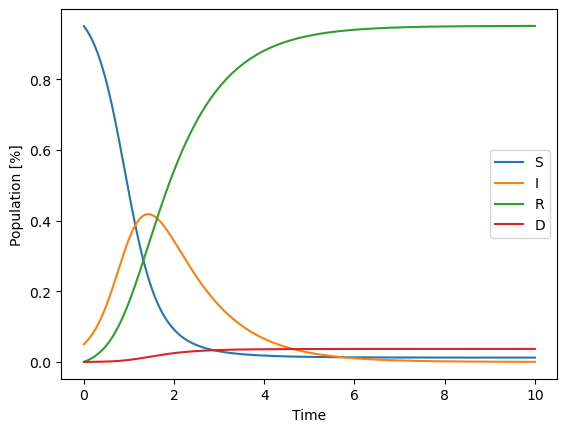

In [36]:
#Diagrams for communities with D
v_Sa=[v_S[t][0] for t in range(nsteps+1)]
#v_Sa
v_Ia=[v_I[t][0] for t in range(nsteps+1)]
#v_Ia
v_Ra=[v_R[t][0] for t in range(nsteps+1)]
#v_Ra
v_Da=[v_D[t][0] for t in range(nsteps+1)]
v_S_data = [0, 0, 0]
v_I_data = [0, 0, 0]
v_R_data = [0, 0, 0]
v_D_data = [0, 0, 0]

for i in range(L):
    v_S_data[i] = [v_S[t][i] for t in range(nsteps+1)]

for i in range(L):
    v_I_data[i] = [v_I[t][i] for t in range(nsteps+1)]

for i in range(L):
    v_R_data[i] = [v_R[t][i] for t in range(nsteps+1)]

for i in range(L):
    v_D_data[i] = [v_D[t][i] for t in range(nsteps+1)]


trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_S_data[0],label='S')
plt.plot(trange,v_I_data[0],label='I')
plt.plot(trange,v_R_data[0],label='R')
plt.plot(trange,v_D_data[0],label='D')
plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/05_SIR_D_communities_a.png', bbox_inches='tight') #Ábra mentése

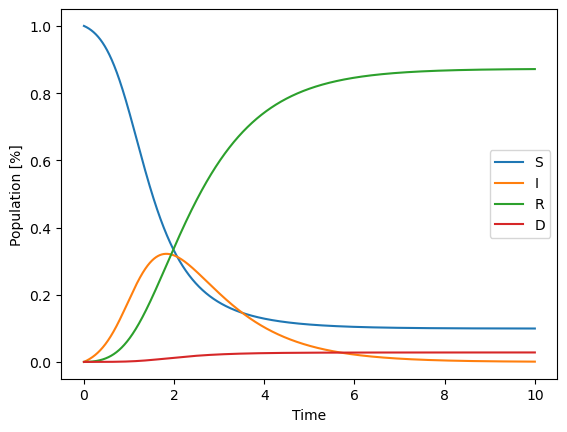

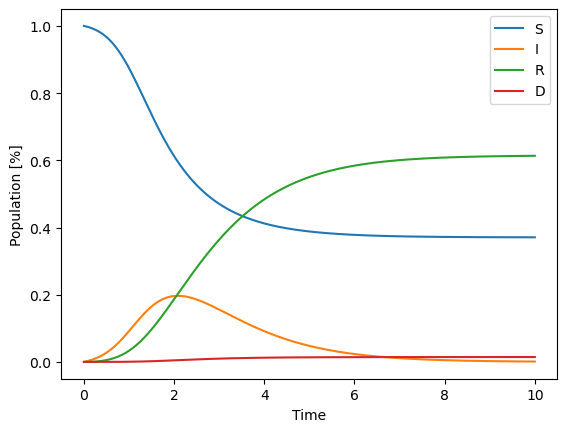

In [37]:
#SIR_D comm diagram b
trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_S_data[1],label='S')
plt.plot(trange,v_I_data[1],label='I')
plt.plot(trange,v_R_data[1],label='R')
plt.plot(trange,v_D_data[1],label='D')
plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/06_SIR_D_communities_b.png', bbox_inches='tight') #Ábra mentése

#SIR_D comm diagram c
trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_S_data[2],label='S')
plt.plot(trange,v_I_data[2],label='I')
plt.plot(trange,v_R_data[2],label='R')
plt.plot(trange,v_D_data[2],label='D')
plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/06_SIR_D_communities_c.png', bbox_inches='tight') #Ábra mentése

In [38]:
#Mérőszámok kinyerése communities-re is  SIRD
print('Total amount of deaths in the ')
for i in range(L):
    print(i, ". community's deaths", format(v_D[nsteps][i]*100, '.3f'), '%')

#Összes fertőzőttek száma (v_I)
infected = [0, 0, 0]
for j in range(L):
    for i in range(nsteps):
        infected[j] += (v_I[i][j]*dt)
    
print('\nTotal amount of infections: ')
for j in range(L):
    print(j, ". community's infections: ", infected[j]*100, " %")

#Maximális megbetegedések száma egyszerre
max_v_I = [0, 0, 0]
for j in range(L):
    for i in range(nsteps):
        if (v_I[i][j] > max_v_I[j]):
            max_v_I[j] = v_I[i][j]
    
print('\nMaximum amount of infected people at the same time: ')
for i in range(L):
    print(i, ". community's amount: ", max_v_I[i]*100, "%")

#Milyen hosszú időszakban volt t < v_I(t)
#'túlterhelt időszak'
q = 0.05
overloadedtime = [0.000, 0.000, 0.000]
for j in range(L):
    for i in range(nsteps):
        if(v_I[i][j] > q):
            overloadedtime[j] += dt
        
print('\nLength of time when v_I(t)>t: ')
for i in range(L):
    print(i, ". community's time when v_I(t)>t: ", overloadedtime[i])

Total amount of deaths in the 
0 . community's deaths 3.684 %
1 . community's deaths 2.817 %
2 . community's deaths 1.457 %

Total amount of infections: 
0 . community's infections:  98.7556913753714  %
1 . community's infections:  89.97250912387003  %
2 . community's infections:  62.806508933923524  %

Maximum amount of infected people at the same time: 
0 . community's amount:  41.815642918354065 %
1 . community's amount:  32.17272337550556 %
2 . community's amount:  19.67103485486835 %

Length of time when v_I(t)>t: 
0 . community's time when v_I(t)>t:  4.292999999999768
1 . community's time when v_I(t)>t:  4.4909999999998345
2 . community's time when v_I(t)>t:  4.220999999999744


Total number of deaths:  0.12960937534666608 %
Total number of infections:  99.64710746900985 %
Maximum amount of infected people at the same time:  51.98288600215548 %
Length of time when v_I_1(t) + v_I_2 > t:  4.29699999999977


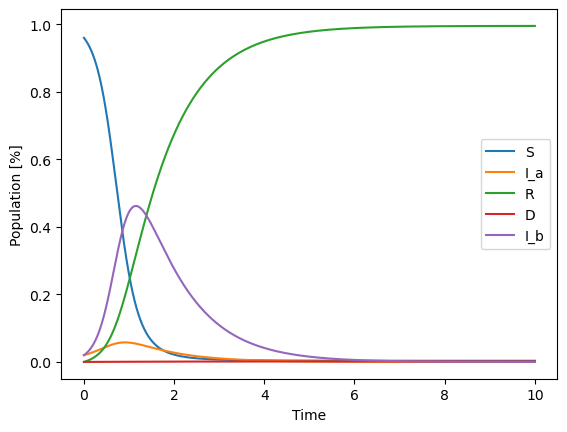

In [39]:
#2 variánssal bíró vírus SIR
import numpy as np

#SIR-ből SIR-D
beta_1 = 6   # b
beta_2 = 3  # a
gamma_1 = 1   # b
gamma_2 = 1   # a
mu_1 = 0.0001 # b 
mu_2 = 0.01   # a

T=10
dt=0.001
nsteps=round(T/dt)
v_S=np.zeros([nsteps+1])
v_I_1=np.zeros([nsteps+1])
v_I_2=np.zeros([nsteps+1])
v_R=np.zeros([nsteps+1])
v_D=np.zeros([nsteps+1])
v_S[0]=0.96
v_I_1[0] = 0.02
v_I_2[0] = 0.02

for t in range(nsteps):
    mu_1_ = mu_1+mu_1*v_I_1[t]
    mu_2_ = mu_2+mu_2*v_I_2[t]
    v_S[t+1]=v_S[t]-dt*v_S[t]*(beta_1*v_I_1[t]+beta_2*v_I_2[t])
    v_I_1[t+1]=v_I_1[t]+dt*beta_1*v_S[t]*v_I_1[t]-gamma_1*v_I_1[t]*dt
    v_I_2[t+1]=v_I_2[t]+dt*beta_2*v_S[t]*v_I_2[t]-gamma_2*v_I_2[t]*dt
    v_R[t+1]=v_R[t]+(1-mu_1_)*gamma_1*v_I_1[t]*dt+(1-mu_2_)*gamma_2*v_I_2[t]*dt
    v_D[t+1]=v_D[t]+mu_1_*gamma_1*v_I_1[t]*dt+mu_2_*gamma_2*v_I_2[t]*dt
#for i in v_I:
#    print(i/10)

#SIRD diagram for 2 versions of the virus
import matplotlib.pyplot as plt
trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_S,label='S')
plt.plot(trange,v_I_2,label='I_a')
plt.plot(trange,v_R,label='R')
plt.plot(trange,v_D,label='D')
plt.plot(trange,v_I_1,label='I_b')

plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/SIR_D_2version_6_3_0.01.png', bbox_inches='tight') #Ábra mentése


#SIRD modellből kinyert adatok generálása 2 variánsra
#halottak száma (v_R)

print('Total number of deaths: ', v_D[nsteps] * 100, '%')

#Összes fertőzőttek száma (v_I)
infected = (sum(v_I_1)*dt + sum(v_I_2)*dt) #changed
print('Total number of infections: ', infected*100, '%')

#Maximális megbetegedések száma egyszerre
print('Maximum amount of infected people at the same time: ', (max(v_I_1) + max(v_I_2))*100, '%') #changed

#Milyen hosszú időszakban volt t < v_I_1(t) + v_I_2(t)
#'túlterhelt időszak'
q = 0.05
overloadedtime = 0.000
for i in v_I_1:
    if(i > q):
        overloadedtime += dt
for i in v_I_2:
    if(i > q):
        overloadedtime += dt
        
print('Length of time when v_I_1(t) + v_I_2 > t: ', overloadedtime)

Total number of deaths:  1.1316917285009185 %
Total number of infections:  94.06086156723849 %
Maximum amount of infected people at the same time:  30.73157974386877 %
Length of time when v_I_a > t:  4.881999999999965


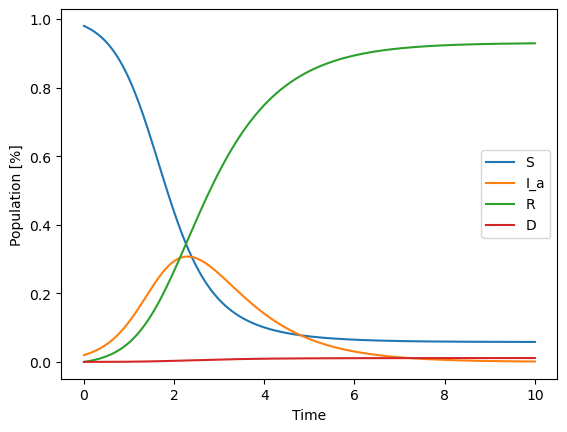

In [40]:
#Csak az a variáns van jelen


beta_1 = 6   # b
beta_2 = 3  # a
gamma_1 = 1   # b
gamma_2 = 1   # a
mu_1 = 0.0001 # b 
mu_2 = 0.01   # a

T=10
dt=0.001
nsteps=round(T/dt)
v_S=np.zeros([nsteps+1])
v_I_1=np.zeros([nsteps+1])
v_I_2=np.zeros([nsteps+1])
v_R=np.zeros([nsteps+1])
v_D=np.zeros([nsteps+1])
v_S[0]=0.98
v_I_1[0] = 0.00
v_I_2[0] = 0.02

for t in range(nsteps):
    mu_1_ = mu_1+mu_1*v_I_1[t]
    mu_2_ = mu_2+mu_2*v_I_2[t]
    v_S[t+1]=v_S[t]-dt*v_S[t]*(beta_1*v_I_1[t]+beta_2*v_I_2[t])
    v_I_1[t+1]=v_I_1[t]+dt*beta_1*v_S[t]*v_I_1[t]-gamma_1*v_I_1[t]*dt
    v_I_2[t+1]=v_I_2[t]+dt*beta_2*v_S[t]*v_I_2[t]-gamma_2*v_I_2[t]*dt
    v_R[t+1]=v_R[t]+(1-mu_1_)*gamma_1*v_I_1[t]*dt+(1-mu_2_)*gamma_2*v_I_2[t]*dt
    v_D[t+1]=v_D[t]+mu_1_*gamma_1*v_I_1[t]*dt+mu_2_*gamma_2*v_I_2[t]*dt
#for i in v_I:
#    print(i/10)

#SIRD diagram for 2 versions of the virus
import matplotlib.pyplot as plt
trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_S,label='S')
plt.plot(trange,v_I_2,label='I_a')
plt.plot(trange,v_R,label='R')
plt.plot(trange,v_D,label='D')


plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/SIR_D_2version_a_variant.png', bbox_inches='tight') #Ábra mentése

#SIRD modellből kinyert adatok generálása 2 variánsra
#halottak száma (v_R)

print('Total number of deaths: ', v_D[nsteps] * 100, '%')

#Összes fertőzőttek száma (v_I)
infected = sum(v_I_2)*dt #changed
print('Total number of infections: ', infected*100, '%')

#Maximális megbetegedések száma egyszerre
print('Maximum amount of infected people at the same time: ', (max(v_I_2))*100, '%') #changed

#Milyen hosszú időszakban volt t < v_I_1(t) + v_I_2(t)
#'túlterhelt időszak'
q = 0.05
overloadedtime = 0.000
for i in v_I_2:
    if(i > q):
        overloadedtime += dt
        
print('Length of time when v_I_a > t: ', overloadedtime)

Total number of deaths:  0.013346664111947624 %
Total number of infections:  99.74258875873484 %
Maximum amount of infected people at the same time:  53.84224972621969 %
Length of time when v_I_b(t) > t:  3.702999999999703


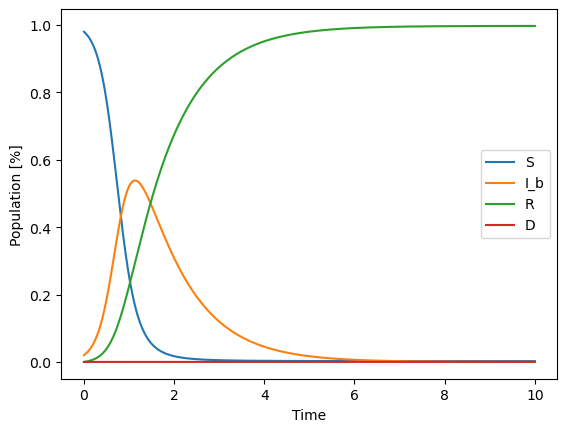

In [41]:
#Csak a b variáns van jelen


beta_1 = 6   # b
beta_2 = 3  # a
gamma_1 = 1   # b
gamma_2 = 1   # a
mu_1 = 0.0001 # b 
mu_2 = 0.01   # a

T=10
dt=0.001
nsteps=round(T/dt)
v_S=np.zeros([nsteps+1])
v_I_1=np.zeros([nsteps+1])
v_I_2=np.zeros([nsteps+1])
v_R=np.zeros([nsteps+1])
v_D=np.zeros([nsteps+1])
v_S[0]=0.98
v_I_1[0] = 0.02
v_I_2[0] = 0.00

for t in range(nsteps):
    mu_1_ = mu_1+mu_1*v_I_1[t]
    mu_2_ = mu_2+mu_2*v_I_2[t]
    v_S[t+1]=v_S[t]-dt*v_S[t]*(beta_1*v_I_1[t]+beta_2*v_I_2[t])
    v_I_1[t+1]=v_I_1[t]+dt*beta_1*v_S[t]*v_I_1[t]-gamma_1*v_I_1[t]*dt
    v_I_2[t+1]=v_I_2[t]+dt*beta_2*v_S[t]*v_I_2[t]-gamma_2*v_I_2[t]*dt
    v_R[t+1]=v_R[t]+(1-mu_1_)*gamma_1*v_I_1[t]*dt+(1-mu_2_)*gamma_2*v_I_2[t]*dt
    v_D[t+1]=v_D[t]+mu_1_*gamma_1*v_I_1[t]*dt+mu_2_*gamma_2*v_I_2[t]*dt
#for i in v_I:
#    print(i/10)

#SIRD diagram for 2 versions of the virus
import matplotlib.pyplot as plt
trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_S,label='S')
plt.plot(trange,v_I_1,label='I_b')
plt.plot(trange,v_R,label='R')
plt.plot(trange,v_D,label='D')


plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/SIR_D_2version_b_variant.png', bbox_inches='tight') #Ábra mentése

#SIRD modellből kinyert adatok generálása 2 variánsra
#halottak száma (v_R)

print('Total number of deaths: ', v_D[nsteps] * 100, '%')

#Összes fertőzőttek száma (v_I)
infected = sum(v_I_1)*dt  #changed
print('Total number of infections: ', infected*100, '%')

#Maximális megbetegedések száma egyszerre
print('Maximum amount of infected people at the same time: ', (max(v_I_1))*100, '%') #changed

#Milyen hosszú időszakban volt t < v_I_1(t)
#'túlterhelt időszak'
q = 0.05
overloadedtime = 0.000
for i in v_I_1:
    if(i > q):
        overloadedtime += dt

        
print('Length of time when v_I_b(t) > t: ', overloadedtime)

In [42]:
# oltás
# SIR_D
beta_vaccine = 1
beta_virus = 3
gamma_vaccine = 1
gamma_virus = 1
mu_vaccine = 0.0001
mu_virus = 0.01    

T=10
dt=0.001
nsteps=round(T/dt)
v_S=np.zeros([nsteps+1])
v_I_vaccine=np.zeros([nsteps+1])
v_I_virus=np.zeros([nsteps+1])
v_R=np.zeros([nsteps+1])
v_D=np.zeros([nsteps+1])
v_S[0]=0.98
v_I_vaccine[0] = 0.01
v_I_virus[0] = 0.01

for t in range(nsteps):
    mu_vaccine_1 = mu_vaccine+mu_vaccine*v_I_vaccine[t]
    mu_virus_2 = mu_virus+mu_virus*v_I_virus[t]
    v_S[t+1]=v_S[t]-dt*v_S[t]*(beta_vaccine*v_I_vaccine[t]+beta_virus*v_I_virus[t])
    v_I_vaccine[t+1]=v_I_vaccine[t]+dt*beta_vaccine*v_S[t]*v_I_vaccine[t]-gamma_vaccine*v_I_vaccine[t]*dt
    v_I_virus[t+1]=v_I_virus[t]+dt*beta_virus*v_S[t]*v_I_virus[t]-gamma_virus*v_I_virus[t]*dt
    v_R[t+1]=v_R[t]+(1-mu_vaccine_1)*gamma_vaccine*v_I_vaccine[t]*dt+(1-mu_virus_2)*gamma_virus*v_I_virus[t]*dt
    v_D[t+1]=v_D[t]+mu_vaccine_1*gamma_vaccine*v_I_vaccine[t]*dt+mu_virus_2*gamma_virus*v_I_virus[t]*dt

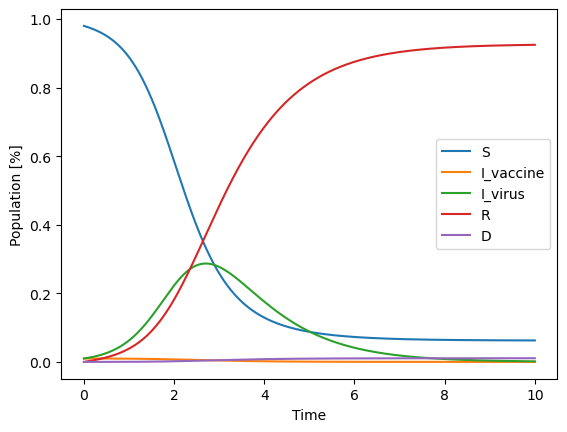

In [43]:
trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_S,label='S')
plt.plot(trange,v_I_vaccine,label='I_vaccine')
plt.plot(trange,v_I_virus,label='I_virus')
plt.plot(trange,v_R,label='R')
plt.plot(trange,v_D,label='D')

plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/08_SIR_D_virus_vaccine.png', bbox_inches='tight') #Ábra mentése

In [44]:
#SIRD 3 cases of vaccines willingness
#1: Some time is needed to be ellapsed after a person got vaccinated
#The "spreading" of the vaccine is defined by the willingness of the society
beta = 3
gamma = 1
delta = 1
epszilon = 3
mu = 0.01

T=10
dt=0.001
nsteps=round(T/dt)
v_S=np.zeros([nsteps+1])
v_I=np.zeros([nsteps+1])
v_V=np.zeros([nsteps+1])
v_R=np.zeros([nsteps+1])
v_D=np.zeros([nsteps+1])
v_S[0]=0.95
v_I[0]=0.05

for t in range(nsteps):
    mu = 0.01+v_I[t]/10
    v_S[t+1]=v_S[t] - dt*beta*v_S[t]*v_I[t] ### ? delta
    v_I[t+1]=v_I[t] + dt*beta*v_S[t]*v_I[t] - gamma*v_I[t]*dt
    v_V[t+1]=v_V[t] + delta*v_S[t]*dt - epszilon*v_V[t]*dt
    v_R[t+1]=v_R[t] + (1-mu)*gamma*v_I[t]*dt + epszilon*v_V[t]*dt
    v_D[t+1]=v_D[t] + mu*gamma*v_I[t]*dt

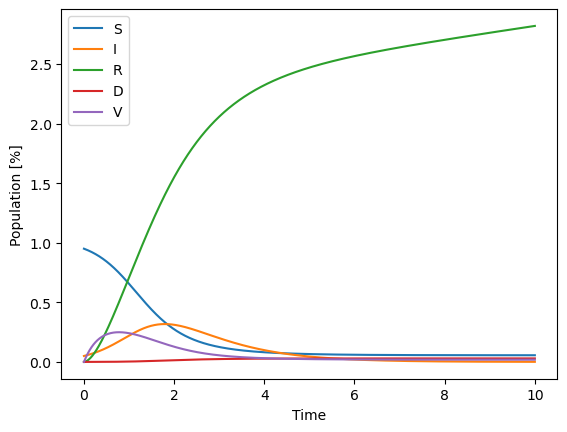

In [45]:
#diagram
#SIRD 3 cases of vaccines willingness 
#1.1: Some time is needed to be ellapsed after a person got vaccinated
trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_S,label='S')
plt.plot(trange,v_I,label='I')
plt.plot(trange,v_R,label='R')
plt.plot(trange,v_D,label='D')
plt.plot(trange,v_V,label='V')

plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/08_SIR_D_Vaccine_cases1_willingness.png', bbox_inches='tight') #Ábra mentése

In [46]:
#SIRD modellből kinyert adatok generálása
#halottak száma (v_R)
#SIRD 3 cases of vaccines
#1: Some time is needed to be ellapsed after a person got vaccinated

print('Total number of deaths: ', v_D[nsteps])

#Összes fertőzőttek száma (v_I)
infected = sum(v_I)*dt

print('Total number of infections: ', infected)

#Maximális megbetegedések száma egyszerre
print('Maximum amount of infected people at the same time: ', max(v_I))

#Milyen hosszú időszakban volt t < v_I(t)
#'túlterhelt időszak'
q = 0.05
overloadedtime = 0.000
for i in v_I:
    if(i > q):
        overloadedtime += dt
        
print('Length of time when v_I(t)>t: ', overloadedtime)

Total number of deaths:  0.029482328993112362
Total number of infections:  0.943248524245135
Maximum amount of infected people at the same time:  0.31768429781060536
Length of time when v_I(t)>t:  4.870999999999961


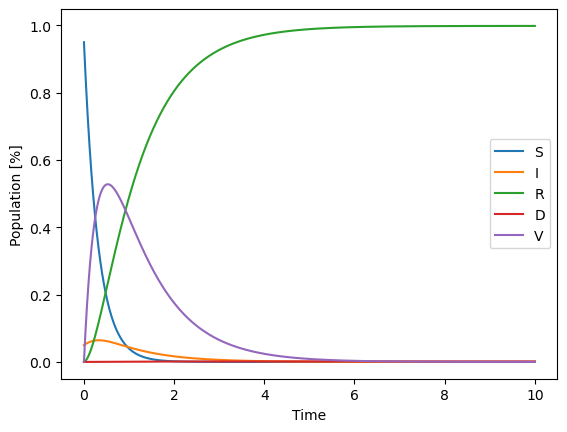

In [28]:
import numpy as np
import matplotlib.pyplot as plt

#SIRD 3 cases of vaccines willingness
#1.1: Some time is needed to be ellapsed after a person got vaccinated
#The "spreading" of the vaccine is defined by the willingness of the society
beta = 3
gamma = 1
delta = 3
epszilon = 1 #50-150
mu = 0.01

T=10
dt=0.001
nsteps=round(T/dt)
v_S=np.zeros([nsteps+1])
v_I=np.zeros([nsteps+1])
v_V=np.zeros([nsteps+1])
v_R=np.zeros([nsteps+1])
v_D=np.zeros([nsteps+1])
v_S[0]=0.95
v_I[0]=0.05

for t in range(nsteps):
    mu = 0.01+v_I[t]/10
    v_S[t+1]=v_S[t] - dt*beta*v_S[t]*v_I[t] - delta*v_S[t]*dt
    v_I[t+1]=v_I[t] + dt*beta*v_S[t]*v_I[t] - gamma*v_I[t]*dt
    v_V[t+1]=v_V[t] + delta*v_S[t]*dt - epszilon*v_V[t]*dt
    v_R[t+1]=v_R[t] + (1-mu)*gamma*v_I[t]*dt + epszilon*v_V[t]*dt
    v_D[t+1]=v_D[t] + mu*gamma*v_I[t]*dt

#diagram
#SIRD 3 cases of vaccines 
#willingness 
#1.1: Some time is needed to be ellapsed after a person got vaccinated
trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_S,label='S')
plt.plot(trange,v_I,label='I')
plt.plot(trange,v_R,label='R')
plt.plot(trange,v_D,label='D')
plt.plot(trange,v_V,label='V')


plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/08_SIR_D_Vaccine_cases1_willingness.png', bbox_inches='tight') #Ábra mentése

In [29]:
#SIRD modellből kinyert adatok generálása
#halottak száma (v_R)
#SIRD 3 cases of vaccines 
#willingness
#1.1: Some time is needed to be ellapsed after a person got vaccinated

print('Total number of deaths: ', v_D[nsteps])

#Összes fertőzőttek száma (v_I)
infected = sum(v_I)*dt
print('Total number of infections: ', infected)

#Maximális megbetegedések száma egyszerre
print('Maximum amount of infected people at the same time: ', max(v_I))

#Milyen hosszú időszakban volt t < v_I(t)
#'túlterhelt időszak'
q = 0.05
overloadedtime = 0.000
for i in v_I:
    if(i > q):
        overloadedtime += dt
        
print('Length of time when v_I(t)>t: ', overloadedtime)

Total number of deaths:  0.0014475207681668109
Total number of infections:  0.10184268155160874
Maximum amount of infected people at the same time:  0.06442911724678715
Length of time when v_I(t)>t:  0.8330000000000006


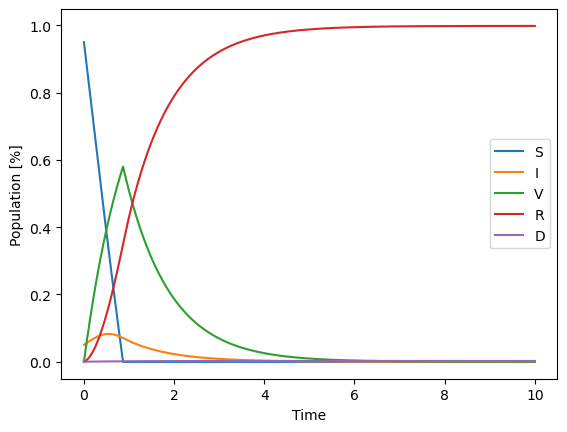

In [30]:
#SIRD 3 cases of vaccines
#capacity
#1.2: Some time is needed to be ellapsed after a person got vaccinated
#The "spreading" of the vaccine is defined by the capacity of it
beta = 3
gamma = 1
delta = 1
epszilon = 1
mu = 0.01

T=10
dt=0.001
nsteps=round(T/dt)
v_S=np.zeros([nsteps+1])
v_I=np.zeros([nsteps+1])
v_V=np.zeros([nsteps+1])
v_R=np.zeros([nsteps+1])
v_D=np.zeros([nsteps+1])
v_S[0]=0.95
v_I[0]=0.05

for t in range(nsteps):
    mu = 0.01+v_I[t]/10
    if v_S[t] <= 0.00:
        delta = 0
    v_S[t+1]=v_S[t] - dt*beta*v_S[t]*v_I[t] - delta*dt
    v_I[t+1]=v_I[t] + dt*beta*v_S[t]*v_I[t] - gamma*v_I[t]*dt
    v_V[t+1]=v_V[t] + delta*dt - epszilon*v_V[t]*dt
    v_R[t+1]=v_R[t] + (1-mu)*gamma*v_I[t]*dt + epszilon*v_V[t]*dt
    v_D[t+1]=v_D[t] + mu*gamma*v_I[t]*dt

#SIRD diagram
#SIRD 3 cases of vaccines
#capacity
#1.2: Some time is needed to be ellapsed after a person got vaccinated
trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_S,label='S')
plt.plot(trange,v_I,label='I')
plt.plot(trange,v_V,label='V')
plt.plot(trange,v_R,label='R')
plt.plot(trange,v_D,label='D')

plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/08_SIR_D_Vaccine_cases1_capacity.png', bbox_inches='tight') #Ábra mentése

In [31]:
#SIRD modellből kinyert adatok generálása
#halottak száma (v_R)
#SIRD 3 cases of vaccines 
#capacity
#1.2: Some time is needed to be ellapsed after a person got vaccinated

print('Total number of deaths: ', v_D[nsteps])

#Összes fertőzőttek száma (v_I)
infected = sum(v_I)*dt

print('Total number of infections: ', infected)

#Maximális megbetegedések száma egyszerre
print('Maximum amount of infected people at the same time: ', max(v_I))

#Milyen hosszú időszakban volt t < v_I(t)
#'túlterhelt időszak'
q = 0.05
overloadedtime = 0.000
for i in v_I:
    if(i > q):
        overloadedtime += dt
        
print('Length of time when v_I(t)>t: ', overloadedtime)

Total number of deaths:  0.002055985337134026
Total number of infections:  0.1336116063033669
Maximum amount of infected people at the same time:  0.08249413383048536
Length of time when v_I(t)>t:  1.2039999999999782


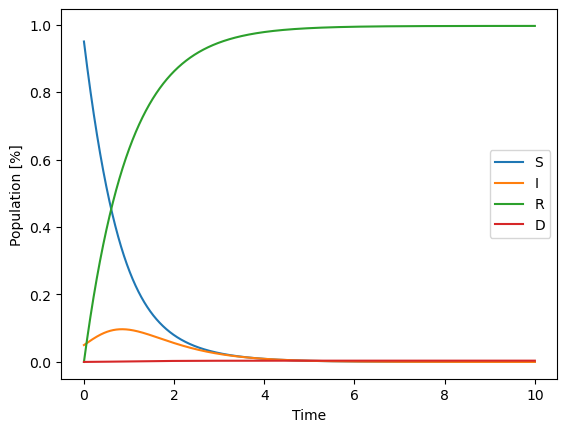

In [32]:
#SIRD 3 cases of vaccines willingness
#2.1: After vaccination, the vaccinated person get an instant protection against the virus
#The "spreading" of the vaccine is defined by the willingness of the society
beta = 3
gamma = 1
delta = 1
mu = 0.01

T=10
dt=0.001
nsteps=round(T/dt)
v_S=np.zeros([nsteps+1])
v_I=np.zeros([nsteps+1])
v_R=np.zeros([nsteps+1])
v_D=np.zeros([nsteps+1])
v_S[0]=0.95
v_I[0]=0.05
for t in range(nsteps):
    mu = 0.01+v_I[t]/10
    v_S[t+1]=v_S[t] - dt*beta*v_S[t]*v_I[t] - delta*v_S[t]*dt
    v_I[t+1]=v_I[t] + dt*beta*v_S[t]*v_I[t] - gamma*v_I[t]*dt
    v_R[t+1]=v_R[t] + (1-mu)*gamma*v_I[t]*dt + delta*v_S[t]*dt
    v_D[t+1]=v_D[t] + mu*gamma*v_I[t]*dt

#SIRD diagram
#SIRD 3 cases of vaccines
#2.1: After vaccination, the vaccinated person get an instant protection against the virus
#The "spreading" of the vaccine is defined by the willingness of the society
trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_S,label='S')
plt.plot(trange,v_I,label='I')
plt.plot(trange,v_R,label='R')
plt.plot(trange,v_D,label='D')

plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/08_SIR_D_Vaccine_cases2_willingness.png', bbox_inches='tight') #Ábra mentése

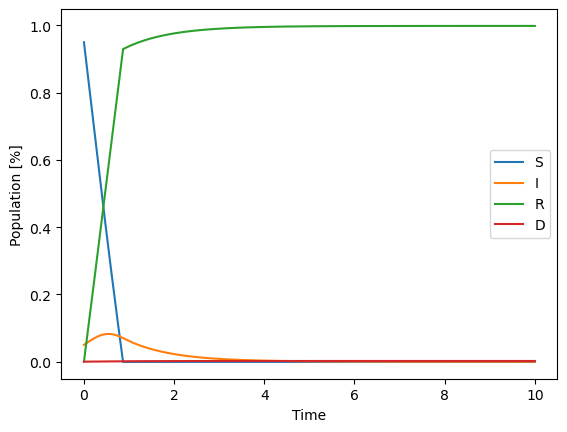

In [33]:
#SIRD 3 cases of vaccines capacity
#2.2: After vaccination, the vaccinated person get an instant protection against the virus

beta = 3
gamma = 1
delta = 1
mu = 0.01

T=10
dt=0.001
nsteps=round(T/dt)
v_S=np.zeros([nsteps+1])
v_I=np.zeros([nsteps+1])
v_R=np.zeros([nsteps+1])
v_D=np.zeros([nsteps+1])
v_S[0]=0.95
v_I[0]=0.05

for t in range(nsteps):
    mu = 0.01+v_I[t]/10
    if v_S[t] <= 0.00:
        delta = 0
    v_S[t+1]=v_S[t] - dt*beta*v_S[t]*v_I[t] - delta*dt
    v_I[t+1]=v_I[t] + dt*beta*v_S[t]*v_I[t] - gamma*v_I[t]*dt
    v_R[t+1]=v_R[t] + (1-mu)*gamma*v_I[t]*dt + delta*dt
    v_D[t+1]=v_D[t] + mu*gamma*v_I[t]*dt

#SIRD diagram
#SIRD 3 cases of vaccines
#2.2: After vaccination, the vaccinated person get an instant protection against the virus
trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_S,label='S')
plt.plot(trange,v_I,label='I')
plt.plot(trange,v_R,label='R')
plt.plot(trange,v_D,label='D')

plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/08_SIR_D_Vaccine_cases2_capacity.png', bbox_inches='tight') #Ábra mentése


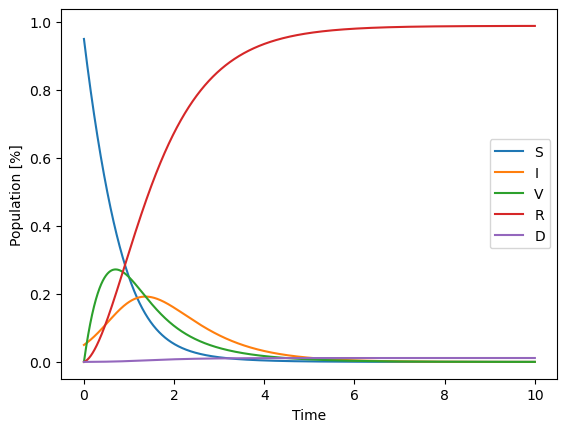

In [34]:
#SIRD 3 cases of vaccines willingness
#3.1: Some time is needed to be ellapsed after a person got vaccinated and they can be injured during that period
#The "spreading" of the vaccine is defined by the willingness of the society
beta = 3
gamma = 1
delta = 1
epszilon = 1
mu = 0.01

T=10
dt=0.001
nsteps=round(T/dt)
v_S=np.zeros([nsteps+1])
v_I=np.zeros([nsteps+1])
v_V=np.zeros([nsteps+1])
v_R=np.zeros([nsteps+1])
v_D=np.zeros([nsteps+1])
v_S[0]=0.95
v_I[0]=0.05

for t in range(nsteps):
    mu = 0.01+v_I[t]/10
    v_S[t+1]=v_S[t] - dt*beta*v_S[t]*v_I[t] - delta*v_S[t]*dt
    v_I[t+1]=v_I[t] + dt*beta*v_S[t]*v_I[t] - gamma*v_I[t]*dt + beta*v_V[t]*v_I[t]*dt
    v_V[t+1]=v_V[t] + delta*v_S[t]*dt - epszilon*v_V[t]*dt - beta*v_V[t]*v_I[t]*dt
    v_R[t+1]=v_R[t] + (1-mu)*gamma*v_I[t]*dt + epszilon*v_V[t]*dt
    v_D[t+1]=v_D[t] + mu*gamma*v_I[t]*dt

#diagram
#SIRD 3 cases of vaccines 
#willingness 
#1: Some time is needed to be ellapsed after a person got vaccinated and they can be injured during that periods
trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_S,label='S')
plt.plot(trange,v_I,label='I')
plt.plot(trange,v_R,label='R')
plt.plot(trange,v_D,label='D')
plt.plot(trange,v_V,label='V')

plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/08_SIR_D_Vaccine_cases3_willingness.png', bbox_inches='tight') #Ábra mentése

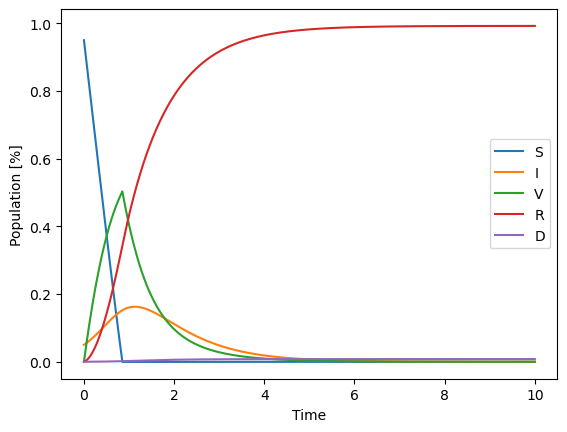

In [35]:
#SIRD 3 cases of vaccines willingness
#3.2: Some time is needed to be ellapsed after a person got vaccinated and they can be injured during that period
beta = 3
gamma = 1
delta = 1
epszilon = 1
mu = 0.01

T=10
dt=0.001
nsteps=round(T/dt)
v_S=np.zeros([nsteps+1])
v_I=np.zeros([nsteps+1])
v_V=np.zeros([nsteps+1])
v_R=np.zeros([nsteps+1])
v_D=np.zeros([nsteps+1])
v_S[0]=0.95
v_I[0]=0.05

for t in range(nsteps):
    mu = 0.01+v_I[t]/10
    if v_S[t] <= 0.00:
        delta = 0
    v_S[t+1]=v_S[t] - dt*beta*v_S[t]*v_I[t] - delta*dt
    v_I[t+1]=v_I[t] + dt*beta*v_S[t]*v_I[t] - gamma*v_I[t]*dt + beta*v_V[t]*v_I[t]*dt
    v_V[t+1]=v_V[t] + delta*dt - epszilon*v_V[t]*dt - beta*v_V[t]*v_I[t]*dt
    v_R[t+1]=v_R[t] + (1-mu)*gamma*v_I[t]*dt + epszilon*v_V[t]*dt
    v_D[t+1]=v_D[t] + mu*gamma*v_I[t]*dt

#diagram
#SIRD 3 cases of vaccines 
#capacity
#3.2: Some time is needed to be ellapsed after a person got vaccinated and they can be injured during that period
trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_S,label='S')
plt.plot(trange,v_I,label='I')
plt.plot(trange,v_V,label='V')
plt.plot(trange,v_R,label='R')
plt.plot(trange,v_D,label='D')

plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/08_SIR_D_Vaccine_cases3_capacity.png', bbox_inches='tight') #Ábra mentése

In [ ]:
# Diagram comparing for the 3 cases of vaccination

